In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [254]:
df = pd.read_csv("banjir_3_tahun_terakhir_cleaned.csv")
df = df.drop(df.columns[[0,1]], axis=1)
df.head()

,tanggal_kejadian,kota_administrasi,lokasi,rw,jumlah_terdampak_jiwa,ketinggian_air
0,2 januari 2018,jakarta barat,"jakarta barat, kamal muara",1,0,20 - 30
1,2 januari 2018,jakarta barat,"jakarta barat, kamal muara",4,0,20 - 30
2,3 januari 2018,jakarta utara,"jakarta utara, kamal",1,0,10 - 25
3,3 januari 2018,jakarta utara,"jakarta utara, kamal",4,0,10 - 25
4,4 januari 2018,jakarta utara,"jakarta utara, kamal",1,0,10 - 25


In [256]:
print('Shape: ', df.shape)

print('---')
print(df.dtypes)

print('---')
print(df.describe())

print('---')
print(df.isnull().sum())

Shape:  (5775, 6)
---
tanggal_kejadian         object
kota_administrasi        object
lokasi                   object
rw                       object
jumlah_terdampak_jiwa     int64
ketinggian_air           object
dtype: object
---
       jumlah_terdampak_jiwa
count            5775.000000
mean              642.268225
std              1730.606501
min                 0.000000
25%                 0.000000
50%                 0.000000
75%               362.000000
max             13450.000000
---
tanggal_kejadian          0
kota_administrasi         0
lokasi                    0
rw                       54
jumlah_terdampak_jiwa     0
ketinggian_air            0
dtype: int64


<h1>QUESTION 1</h1>
<h3>Apakah ada features yang data type-nya tidak sesuai?</h3>

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5775 entries, 0 to 5774
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tanggal_kejadian       5775 non-null   object
 1   kota_administrasi      5775 non-null   object
 2   lokasi                 5775 non-null   object
 3   rw                     5721 non-null   object
 4   jumlah_terdampak_jiwa  5775 non-null   int64 
 5   ketinggian_air         5775 non-null   object
dtypes: int64(1), object(5)
memory usage: 270.8+ KB


In [258]:
import dateparser

# Mengubah tipe data kolom 'tanggal' menjadi datetime
df['tanggal_kejadian'] = df['tanggal_kejadian'].apply(lambda x: dateparser.parse(x))

In [259]:
import re

# Menghapus kata "cm" dari kolom
df['ketinggian_air'] = df['ketinggian_air'].str.lower()
for i in range(len(df['ketinggian_air'].to_numpy())) :
    new_text = re.sub(r"cm", "", df['ketinggian_air'].to_numpy()[i])
    # new_text = re.sub(r"s.d.", "-", new_text)
    df['ketinggian_air'][i] = new_text
# Memisahkan angka dengan delimiter '-'
ketinggian_air = df['ketinggian_air'].str.replace("s.d.","-")
ketinggian_air = ketinggian_air.str.split("-")
for i in range(len(ketinggian_air)) : 
    if len(ketinggian_air[i]) > 1 :
        ketinggian_air[i] = ketinggian_air[i][-1]
    else : 
        ketinggian_air[i] = ketinggian_air[i][0]
    # print(ketinggian_air[i])
    print(ketinggian_air[i]," : ",type(int(ketinggian_air[i])))

# Mengambil angka kedua setelah pemisahan
df['ketinggian_air'] = ketinggian_air
# Menghapus spasi di setiap nilai dalam kolom 'kolom_1'
df['ketinggian_air'] = df['ketinggian_air'].str.replace(' ', '')
# df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5560\734111376.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ketinggian_air'][i] = new_text
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5560\734111376.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  ketinggian_air = df['ketinggian_air'].str.replace("s.d.","-")


 30   :  <class 'int'>
 30   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
 25   :  <class 'int'>
15  :  <class 'int'>
20  :  <class 'int'>
 20   :  <class 'int'>
 20   :  <class 'int'>
 20   :  <class 'int'>
 20   :  <class 'int'>
 30   :  <class 'int'>
 30   :  <class 'int'>
 30   :  <class 'int'>
 30   :  <class 'int'>
 30   :  <class 'int'>
 30   :  <class 'int'>
 30   :  <class 'int'>
 30   :  <class 'int'>
 30   :  <class 'int'>
 20    :  <class 'int'>
 20    :  <class 'int'>
 40   :  <class 'int'>
 40   :  <class 'int'>
 40   :  <class 'int'>
 40   :  <class 'int'>
 35   :  <class 'int'>
 35   :  <class 'int'>
 35   :  <class 'int'>
 35   :  <class 'int'>
 35   :  <class 'int'>
 35   :  <class 'int'>
 50   :  <class 'int'>
 50   :  <class 'int'>
 10   :  <class 'int'>
 10   :  <class 'int'>
 10   :  <cla

In [219]:
# Mengganti tipe data kolom 'kolom_1' menjadi int64
# for i in df['ketinggian_air'].to_numpy() :
#     print(i)
# df.info()

In [260]:
df['ketinggian_air'] = df['ketinggian_air'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5775 entries, 0 to 5774
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tanggal_kejadian       5765 non-null   datetime64[ns]
 1   kota_administrasi      5775 non-null   object        
 2   lokasi                 5775 non-null   object        
 3   rw                     5721 non-null   object        
 4   jumlah_terdampak_jiwa  5775 non-null   int64         
 5   ketinggian_air         5775 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 270.8+ KB


In [343]:
df.to_csv('banjir-clean-banget.csv')

In [267]:
df.head()

,tanggal_kejadian,kota_administrasi,lokasi,rw,jumlah_terdampak_jiwa,ketinggian_air,tahun
0,2018-01-02,jakarta barat,"jakarta barat, kamal muara",1,0,30,2018.0
1,2018-01-02,jakarta barat,"jakarta barat, kamal muara",4,0,30,2018.0
2,2018-01-03,jakarta utara,"jakarta utara, kamal",1,0,25,2018.0
3,2018-01-03,jakarta utara,"jakarta utara, kamal",4,0,25,2018.0
4,2018-01-04,jakarta utara,"jakarta utara, kamal",1,0,25,2018.0


In [268]:
df.isna().sum().sort_values(ascending=False)

rw                       54
tanggal_kejadian         10
tahun                    10
kota_administrasi         0
lokasi                    0
jumlah_terdampak_jiwa     0
ketinggian_air            0
dtype: int64

In [269]:
# Menghapus baris dengan nilai kosong di kolom 'tanggal_kejadian'
df = df.dropna(subset=['tanggal_kejadian'])
df.isna().sum().sort_values(ascending=False)

rw                       54
tanggal_kejadian          0
kota_administrasi         0
lokasi                    0
jumlah_terdampak_jiwa     0
ketinggian_air            0
tahun                     0
dtype: int64

In [270]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

158
0


In [312]:
# Membuat kolom 'tahun' yang berisi tahun dari kolom 'tanggal_kejadian'
df['tahun'] = df['tanggal_kejadian'].dt.year
# Mengubah kolom 'tahun' ke tipe data datetime
df['tahun'] = df['tahun'].astype('int64')
# Mencari indeks baris yang memiliki nilai "kelupauan seribu" pada kolom 'kota_administrasi'
indexes_to_drop = df[df['kota_administrasi'] == 'kelupauan seribu'].index

# Menghapus baris berdasarkan indeks yang didapatkan
df.drop(indexes_to_drop, inplace=True)
df.head()

,tanggal_kejadian,kota_administrasi,lokasi,rw,jumlah_terdampak_jiwa,ketinggian_air,tahun
0,2018-01-02,jakarta barat,"jakarta barat, kamal muara",1,0,30,2018
1,2018-01-02,jakarta barat,"jakarta barat, kamal muara",4,0,30,2018
2,2018-01-03,jakarta utara,"jakarta utara, kamal",1,0,25,2018
3,2018-01-03,jakarta utara,"jakarta utara, kamal",4,0,25,2018
4,2018-01-04,jakarta utara,"jakarta utara, kamal",1,0,25,2018


In [341]:
from geopy.geocoders import Nominatim

latitude = []
longitude = []
lokasi = df['lokasi'].to_numpy()
for i in range(len(lokasi)) : 
    try :
        # Membuat objek geolocator
        geolocator = Nominatim(user_agent="my_geocoder")

        # Mengirimkan alamat yang ingin dicari longitude dan latitude-nya
        location = geolocator.geocode(str(lokasi[i]))

        # Mendapatkan longitude dan latitude dari hasil geocoding
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except Exception as e :
        print("error di sini : ", lokasi[i])

    # print("Latitude:", latitude)
    # print("Longitude:", longitude)
    
latitude

error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta selatan, pangadegan
error di sini :  jakarta timur, kampung melayu
error di sini :  jakarta timur, kampung melayu
error di sini :  jakarta timur, kampung melayu
error di sini :  jakarta timur, kampung melayu
error di sini :  jakarta timur, kampung melayu
error di sini :  jakarta timur, kampung melayu
error di sini :  jakarta timur, kampung melayu
error di sini :  jakarta timur, kampung melayu
error di sini :  jakarta timur, cawang
error di sini :  jakarta timur, cawang
error di sini :  jakarta timur, cawang
error di sini :  jakarta timur, cawang
error di sini :  j

[-6.1217297,
 -6.1217297,
 -6.1075478,
 -6.1075478,
 -6.1075478,
 -6.1075478,
 -6.1075478,
 -6.1075478,
 -6.1075478,
 -6.1075478,
 -6.1075478,
 -6.1075478,
 -6.1551589,
 -6.1488854,
 -6.1789591,
 -6.1789591,
 -6.1789591,
 -6.1789591,
 -6.1229723,
 -6.1229723,
 -6.1229723,
 -6.1229723,
 -6.1229723,
 -6.1229723,
 -6.1229723,
 -6.1229723,
 -6.1229723,
 -6.1765344,
 -6.1765344,
 -6.1221936,
 -6.1221936,
 -6.1221936,
 -6.1221936,
 -6.1763601,
 -6.1763601,
 -6.1763601,
 -6.1763601,
 -6.1763601,
 -6.1763601,
 -6.1592853,
 -6.1592853,
 -6.1098554,
 -6.1098554,
 -6.1098554,
 -6.1098554,
 -6.1098554,
 -6.1098554,
 -6.11726515,
 -6.11726515,
 -6.1229723,
 -6.1524249,
 -6.1524249,
 -6.1524249,
 -6.1524249,
 -6.1626344,
 -6.1626344,
 -6.1351531,
 -6.1351531,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.1191781,
 -6.119178

In [313]:
# Daftar kota administrasi yang ingin ditampilkan
kota_administrasi = df['kota_administrasi'].unique()
kota_administrasi

array(['jakarta barat', 'jakarta utara', 'jakarta pusat',
       'jakarta selatan', 'jakarta timur'], dtype=object)

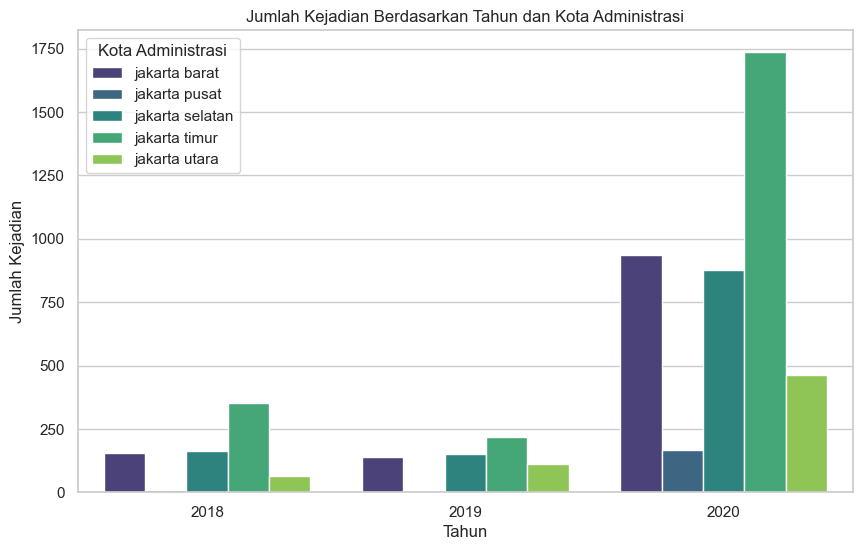

In [315]:
# Mengelompokkan data berdasarkan tahun dan kota administrasi, dan menghitung jumlah kejadian di setiap kelompok
df_count = df.groupby(['tahun', 'kota_administrasi']).size().reset_index(name='jumlah_kejadian')

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Menggunakan Seaborn untuk membuat diagram batang dengan warna yang berbeda untuk setiap tahun
sns.barplot(x='tahun', y='jumlah_kejadian', hue='kota_administrasi', data=df_count, palette='viridis')

# Memberikan judul dan label sumbu pada diagram batang
plt.title('Jumlah Kejadian Berdasarkan Tahun dan Kota Administrasi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejadian')

# Menampilkan legend
plt.legend(title='Kota Administrasi', loc='upper left')

# Menampilkan diagram batang
plt.show()

Pada diagram di atas di ketahui jika jakarta timur di tiap tahunnya memiliki jumlah banjir tertinggi dan selalu meningkat di tiap tahunnya

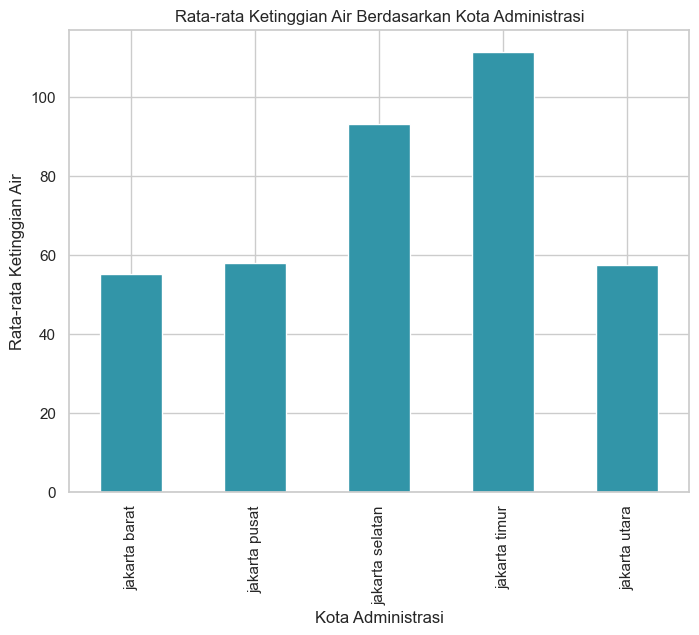

In [328]:
mean_by_kota_administrasi = df.groupby('kota_administrasi')['ketinggian_air'].mean()

plt.figure(figsize=(8, 6))
mean_by_kota_administrasi.plot(kind='bar', color='#3295a8')

plt.title('Rata-rata Ketinggian Air Berdasarkan Kota Administrasi')
plt.xlabel('Kota Administrasi')
plt.ylabel('Rata-rata Ketinggian Air')

plt.show()


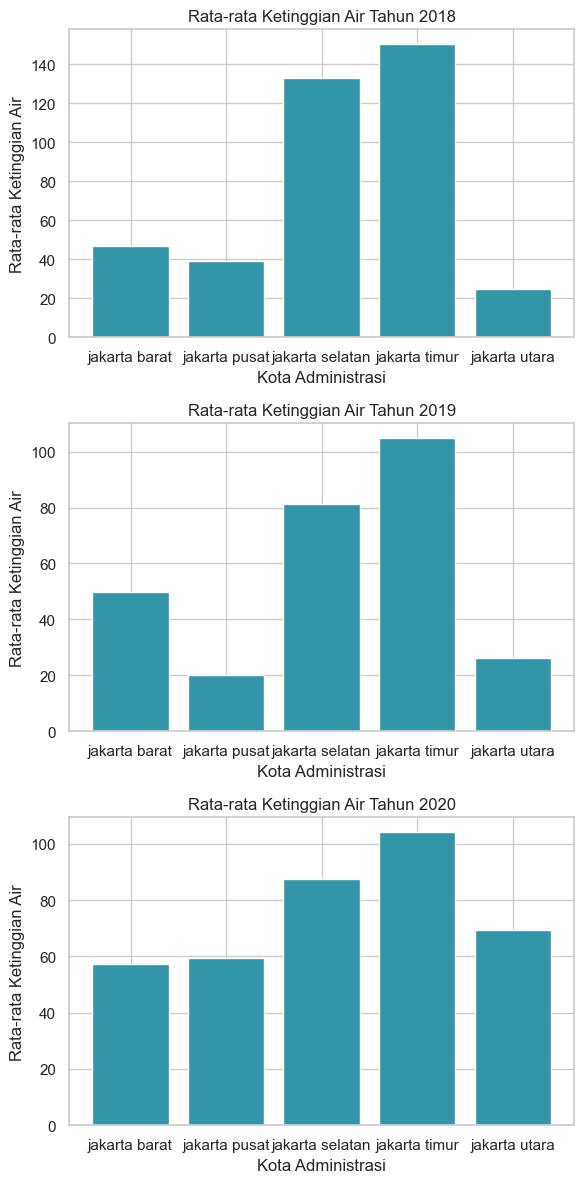

In [332]:
mean_by_tahun_kota_administrasi = df.groupby(['tahun', 'kota_administrasi'])['ketinggian_air'].mean()


# Mendapatkan daftar tahun unik
years = df['tahun'].unique()

# Menentukan jumlah subplot berdasarkan jumlah tahun
num_subplots = len(years)

# Mengatur ukuran subplot sesuai dengan kebutuhan
fig, axes = plt.subplots(num_subplots, 1, figsize=(6, 4*num_subplots))

# Iterasi setiap tahun
for i, year in enumerate(years):
    # Filter data berdasarkan tahun
    data_year = mean_by_tahun_kota_administrasi.loc[year]
    
    # Membuat diagram batang untuk tahun tertentu
    axes[i].bar(data_year.index, data_year.values, color='#3295a8')
    axes[i].set_title(f'Rata-rata Ketinggian Air Tahun {year}')
    axes[i].set_xlabel('Kota Administrasi')
    axes[i].set_ylabel('Rata-rata Ketinggian Air')

plt.tight_layout()
plt.show()

Di tiap tahunnya Jakarta Timur memiliki rata rata ketinggian air tertinggi

In [335]:
from geopy.geocoders import Nominatim

# Membuat objek geolocator
geolocator = Nominatim(user_agent="my_geocoder")

# Mengirimkan alamat yang ingin dicari longitude dan latitude-nya
location = geolocator.geocode("Jakarta Barat, Kamal Muara")

# Mendapatkan longitude dan latitude dari hasil geocoding
latitude = location.latitude
longitude = location.longitude

print("Latitude:", latitude)
print("Longitude:", longitude)

Latitude: -6.1217297
Longitude: 106.7318739


In [338]:
lokasi_count = df['lokasi'].value_counts()

df_count = lokasi_count.reset_index()
df_count.columns = ['lokasi', 'count']

heatmap_data = df_count.pivot('lokasi', 'count')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="g")
plt.title('Heatmap Jumlah Lokasi')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5560\1518645461.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df_count.pivot('lokasi', 'count')


ValueError: zero-size array to reduction operation fmin which has no identity

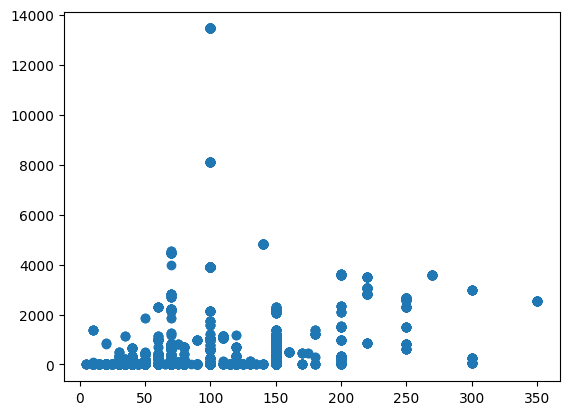

In [198]:
import matplotlib.pyplot as plt

x = df['ketinggian_air'].astype('int64').to_numpy()
y= df['jumlah_terdampak_jiwa'].to_numpy()

plt.scatter(x, y)
plt.show()

c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\skl

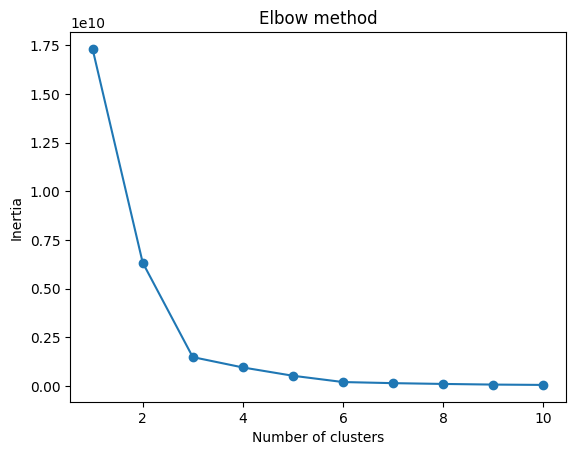

In [199]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


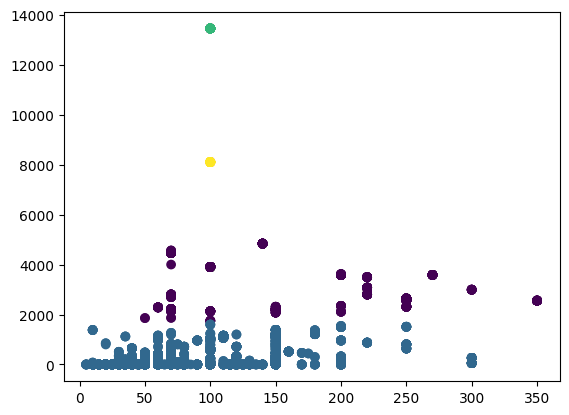

In [200]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [201]:
x = df['ketinggian_air'].astype('int64').to_numpy()
y = df['jumlah_terdampak_jiwa'].to_numpy()

# Persiapkan data
data = {
    'x': x,
    'y': y
}
df_kluster = pd.DataFrame(data)

# Buat objek KMeans dengan 2 kluster
kmeans = KMeans(n_clusters=4)

# Fit model K-means dengan data
kmeans.fit(df_kluster)

# Prediksi kluster
df_kluster['kluster'] = kmeans.predict(df_kluster)

c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [202]:
kluster = df_kluster['kluster'].to_numpy()